In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## # Required Modules

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [41]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM, GRU, Bidirectional, SimpleRNN, RNN, Flatten, Dropout

## # Features Function

In [5]:
def features(sentence, index):
  return [
        sentence[index],
        '1' if index == 0 else '0',
        '1' if index == len(sentence) - 1 else '0',
        sentence[index][0],
        sentence[index][:2],
        sentence[index][:3],
        sentence[index][-1],
        sentence[index][-2:],
        sentence[index][-3:],
        '' if index == 0 else sentence[index - 1],
        '' if index == len(sentence) - 1 else sentence[index + 1],
        '' if index >= len(sentence) - 2 else sentence[index + 2],
        '1' if sentence[index].isdigit() else '0'
    ]

## # Helper functions to save results

In [ ]:
from sklearn.metrics import classification_report
import pickle
def save_obj(obj, name ):
    with open('/content/drive/MyDrive/M.TECH/NLP/output/'+ name + '.pkl', 'ab') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        f.close()

def load_obj(name ):
    with open('/content/drive/MyDrive/M.TECH/NLP/output/'+ name + '.pkl', 'rb') as f:  
      objs = []
      while 1:
          try:
              x = pickle.load(f)
              objs.append(x)
              for filename in x.keys():
                print(filename, x[filename]['accuracy'],x[filename]['weighted avg'])
          except EOFError:
              break
      
      return objs

## # Data preprocessing

In [37]:
files_all = ["guj_art and culture_sample1.txt", "guj_economy_sample2.txt", "guj_entertainment_sample3.txt", "guj_philosophy_sample4.txt", "guj_religion_sample5.txt", "guj_science and technology_sample6.txt", "guj_sports_sample7.txt"]
word_sentences = []
tag_sentences = []

# data loading
# files = [files_all[1]]
files = files_all
# filename = files_all[1].split('.')[0]
filename = "combined"
print(filename)
for file_ in files:
    file = open("/content/drive/MyDrive/M.TECH/NLP/" + file_, "r")
    contents = file.read().split('\n')

    for i in range(1,len(contents)):
        s = contents[i].split('\t')[1]
        words = []
        tags = []
        for ss in s.split(' '):
            if len(ss.split('\\')) != 2:
                continue
            word = ss.split('\\')[0]
            tag = ss.split('\\')[1]
            words.append(word)
            tags.append(tag)
        word_sentences.append(words)
        tag_sentences.append(tags)

    file.close()

# feature extraction
X = []
Y = []
for sentence, tags in zip(word_sentences, tag_sentences):
    X.extend([features(sentence, index) for index in range(len(sentence))])
    Y.extend([tag for tag in tags])
print(X[1])
print(Y[1])

# converting class label to numpy array by converting to catagorical
unique = sorted(list(set(Y)))

ind_to_class = {}
class_to_ind = {}
ind = 0

for cls in unique:
  ind_to_class[ind] = cls
  class_to_ind[cls] = ind
  ind += 1
n_class = len(unique)

# tokenization and encoding of features
word_tokenizer = Tokenizer()                      
word_tokenizer.fit_on_texts(X)                    
X = word_tokenizer.texts_to_sequences(X) 
X = np.array(X) 

len_voc = len(word_tokenizer.word_index) + 1

for i in range(len(Y)):
  ind = class_to_ind[Y[i]]
  temp = np.zeros(n_class)
  temp[ind] = 1
  Y[i] = temp 
Y = np.array(Y)

print("X shape :", X.shape)
print("Y shape :", Y.shape)

combined
['ઇતિહાસમાં', '0', '0', 'ઇ', 'ઇત', 'ઇતિ', 'ં', 'ાં', 'માં', 'સંગીતના', 'જેમનું', 'નામ', '0']
N_NN
X shape : (97240, 13)
Y shape : (97240, 34)


 ## # Split into Train, Test and Validation

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25) 

In [39]:
true = []
for i in range(len(y_test)):
  ind = np.argmax(y_test[i])
  true.append(ind_to_class[ind])

## # RNN Model

In [28]:
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim = len_voc, output_dim = 300, input_length = X.shape[1]))
rnn_model.add(SimpleRNN(64))
rnn_model.add(Dense(y_train.shape[1], activation='softmax'))
rnn_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
rnn_training = rnn_model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
117/117 [==============================] - 4s 28ms/step - loss: 1.8802 - acc: 0.5540 - val_loss: 0.4879 - val_acc: 0.8929
Epoch 2/10
117/117 [==============================] - 3s 25ms/step - loss: 0.2448 - acc: 0.9579 - val_loss: 0.3659 - val_acc: 0.9126
Epoch 3/10
117/117 [==============================] - 3s 26ms/step - loss: 0.0984 - acc: 0.9836 - val_loss: 0.3650 - val_acc: 0.9122
Epoch 4/10
117/117 [==============================] - 3s 26ms/step - loss: 0.0654 - acc: 0.9851 - val_loss: 0.3741 - val_acc: 0.9114
Epoch 5/10
117/117 [==============================] - 3s 26ms/step - loss: 0.0389 - acc: 0.9915 - val_loss: 0.3677 - val_acc: 0.9142
Epoch 6/10
117/117 [==============================] - 3s 26ms/step - loss: 0.0231 - acc: 0.9957 - val_loss: 0.3798 - val_acc: 0.9126
Epoch 7/10
117/117 [==============================] - 3s 25ms/step - loss: 0.0183 - acc: 0.9975 - val_loss: 0.4045 - val_acc: 0.9142
Epoch 8/10
117/117 [==============================] - 3s 26ms/step - 

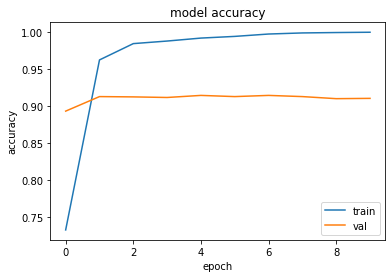

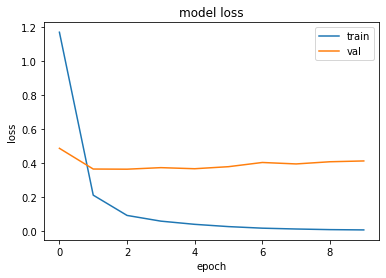

In [31]:
result = rnn_training
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

## # LSTM Model

In [32]:
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim = len_voc, output_dim = 300, input_length = X.shape[1]))
lstm_model.add(LSTM(64))
lstm_model.add(Dense(y_train.shape[1], activation='softmax'))
lstm_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
lstm_training = lstm_model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
117/117 [==============================] - 32s 22ms/step - loss: 2.4244 - acc: 0.4460 - val_loss: 1.0208 - val_acc: 0.7253
Epoch 2/10
117/117 [==============================] - 2s 20ms/step - loss: 0.6667 - acc: 0.8293 - val_loss: 0.5357 - val_acc: 0.8773
Epoch 3/10
117/117 [==============================] - 2s 20ms/step - loss: 0.2534 - acc: 0.9501 - val_loss: 0.4384 - val_acc: 0.9010
Epoch 4/10
117/117 [==============================] - 2s 20ms/step - loss: 0.1472 - acc: 0.9687 - val_loss: 0.4151 - val_acc: 0.8933
Epoch 5/10
117/117 [==============================] - 2s 20ms/step - loss: 0.0892 - acc: 0.9807 - val_loss: 0.3839 - val_acc: 0.9038
Epoch 6/10
117/117 [==============================] - 2s 20ms/step - loss: 0.0615 - acc: 0.9860 - val_loss: 0.4210 - val_acc: 0.9090
Epoch 7/10
117/117 [==============================] - 2s 19ms/step - loss: 0.0564 - acc: 0.9878 - val_loss: 0.3928 - val_acc: 0.9066
Epoch 8/10
117/117 [==============================] - 2s 20ms/step -

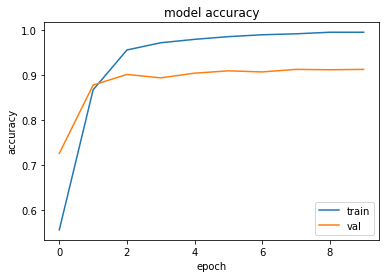

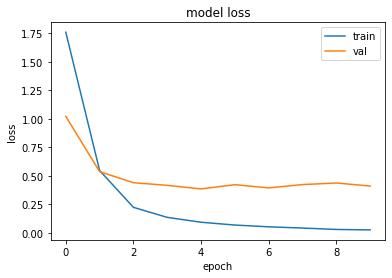

In [33]:
result = lstm_training
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

## # BiLSTM Model

In [34]:
bidirect_model = Sequential()
bidirect_model.add(Embedding(input_dim = len_voc, output_dim = 300, input_length = X.shape[1]))
bidirect_model.add(Bidirectional(LSTM(64)))
bidirect_model.add(Dense(y_train.shape[1], activation='softmax'))
bidirect_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
bidirect_training = bidirect_model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
117/117 [==============================] - 6s 28ms/step - loss: 2.2669 - acc: 0.4506 - val_loss: 0.7388 - val_acc: 0.8107
Epoch 2/10
117/117 [==============================] - 3s 21ms/step - loss: 0.4491 - acc: 0.8874 - val_loss: 0.4419 - val_acc: 0.8941
Epoch 3/10
117/117 [==============================] - 3s 22ms/step - loss: 0.1548 - acc: 0.9645 - val_loss: 0.4252 - val_acc: 0.9018
Epoch 4/10
117/117 [==============================] - 3s 22ms/step - loss: 0.0808 - acc: 0.9814 - val_loss: 0.4159 - val_acc: 0.9058
Epoch 5/10
117/117 [==============================] - 3s 21ms/step - loss: 0.0409 - acc: 0.9897 - val_loss: 0.4609 - val_acc: 0.9034
Epoch 6/10
117/117 [==============================] - 3s 21ms/step - loss: 0.0255 - acc: 0.9963 - val_loss: 0.4342 - val_acc: 0.9114
Epoch 7/10
117/117 [==============================] - 2s 21ms/step - loss: 0.0224 - acc: 0.9950 - val_loss: 0.4746 - val_acc: 0.9022
Epoch 8/10
117/117 [==============================] - 2s 21ms/step - 

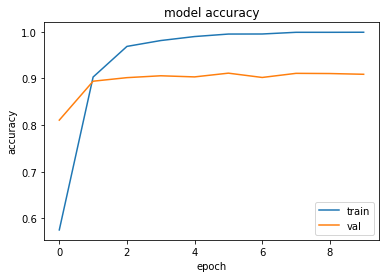

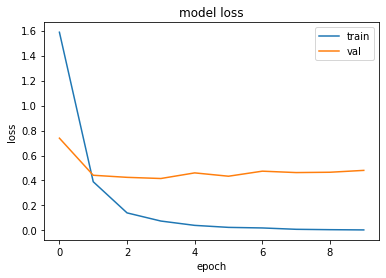

In [36]:
result = bidirect_training
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

## # Final Model

In [52]:
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim = len_voc, output_dim = 300, input_length = X.shape[1]))
lstm_model.add(LSTM(64))
lstm_model.add(Dense(y_train.shape[1], activation='softmax'))
lstm_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
lstm_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 13, 300)           8589900   
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                93440     
_________________________________________________________________
dense_10 (Dense)             (None, 34)                2210      
Total params: 8,685,550
Trainable params: 8,685,550
Non-trainable params: 0
_________________________________________________________________


In [48]:
checkpoint = ModelCheckpoint("/content/drive/MyDrive/M.TECH/NLP/rnn_model.hdf5", monitor='val_loss', verbose=1,save_best_only=True, mode='auto', period=1)
lstm_training = lstm_model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_val, y_val), callbacks = [checkpoint])

Epoch 1/10
912/912 [==============================] - 75s 81ms/step - loss: 1.3074 - acc: 0.6515 - val_loss: 0.3521 - val_acc: 0.8983

Epoch 00001: val_loss improved from inf to 0.35210, saving model to /content/drive/MyDrive/M.TECH/NLP/rnn_model.hdf5
Epoch 2/10
912/912 [==============================] - 73s 80ms/step - loss: 0.2037 - acc: 0.9414 - val_loss: 0.3183 - val_acc: 0.9070

Epoch 00002: val_loss improved from 0.35210 to 0.31828, saving model to /content/drive/MyDrive/M.TECH/NLP/rnn_model.hdf5
Epoch 3/10
912/912 [==============================] - 72s 79ms/step - loss: 0.0997 - acc: 0.9712 - val_loss: 0.3498 - val_acc: 0.9045

Epoch 00003: val_loss did not improve from 0.31828
Epoch 4/10
912/912 [==============================] - 71s 78ms/step - loss: 0.0559 - acc: 0.9846 - val_loss: 0.4008 - val_acc: 0.9067

Epoch 00004: val_loss did not improve from 0.31828
Epoch 5/10
912/912 [==============================] - 71s 78ms/step - loss: 0.0293 - acc: 0.9918 - val_loss: 0.4413 - va

In [53]:
lstm_model.load_weights("/content/drive/MyDrive/M.TECH/NLP/rnn_model.hdf5")

## # Confusion Matrix

['CC_CCD', 'CC_CCS', 'CC_CCS_UT', 'DM_DMD', 'DM_DMI', 'DM_DMQ', 'DM_DMR', 'JJ', 'N_NN', 'N_NNP', 'N_NST', 'PR_PRC', 'PR_PRF', 'PR_PRI', 'PR_PRL', 'PR_PRP', 'PR_PRQ', 'PSP', 'QT_QTC', 'QT_QTF', 'QT_QTO', 'RB', 'RD_ECH', 'RD_PUNC', 'RD_RDF', 'RD_SYM', 'RP_CL', 'RP_INJ', 'RP_INTF', 'RP_NEG', 'RP_RPD', 'V_VAUX', 'V_VAUX_VNP', 'V_VM']
Confusion matrix, without normalization


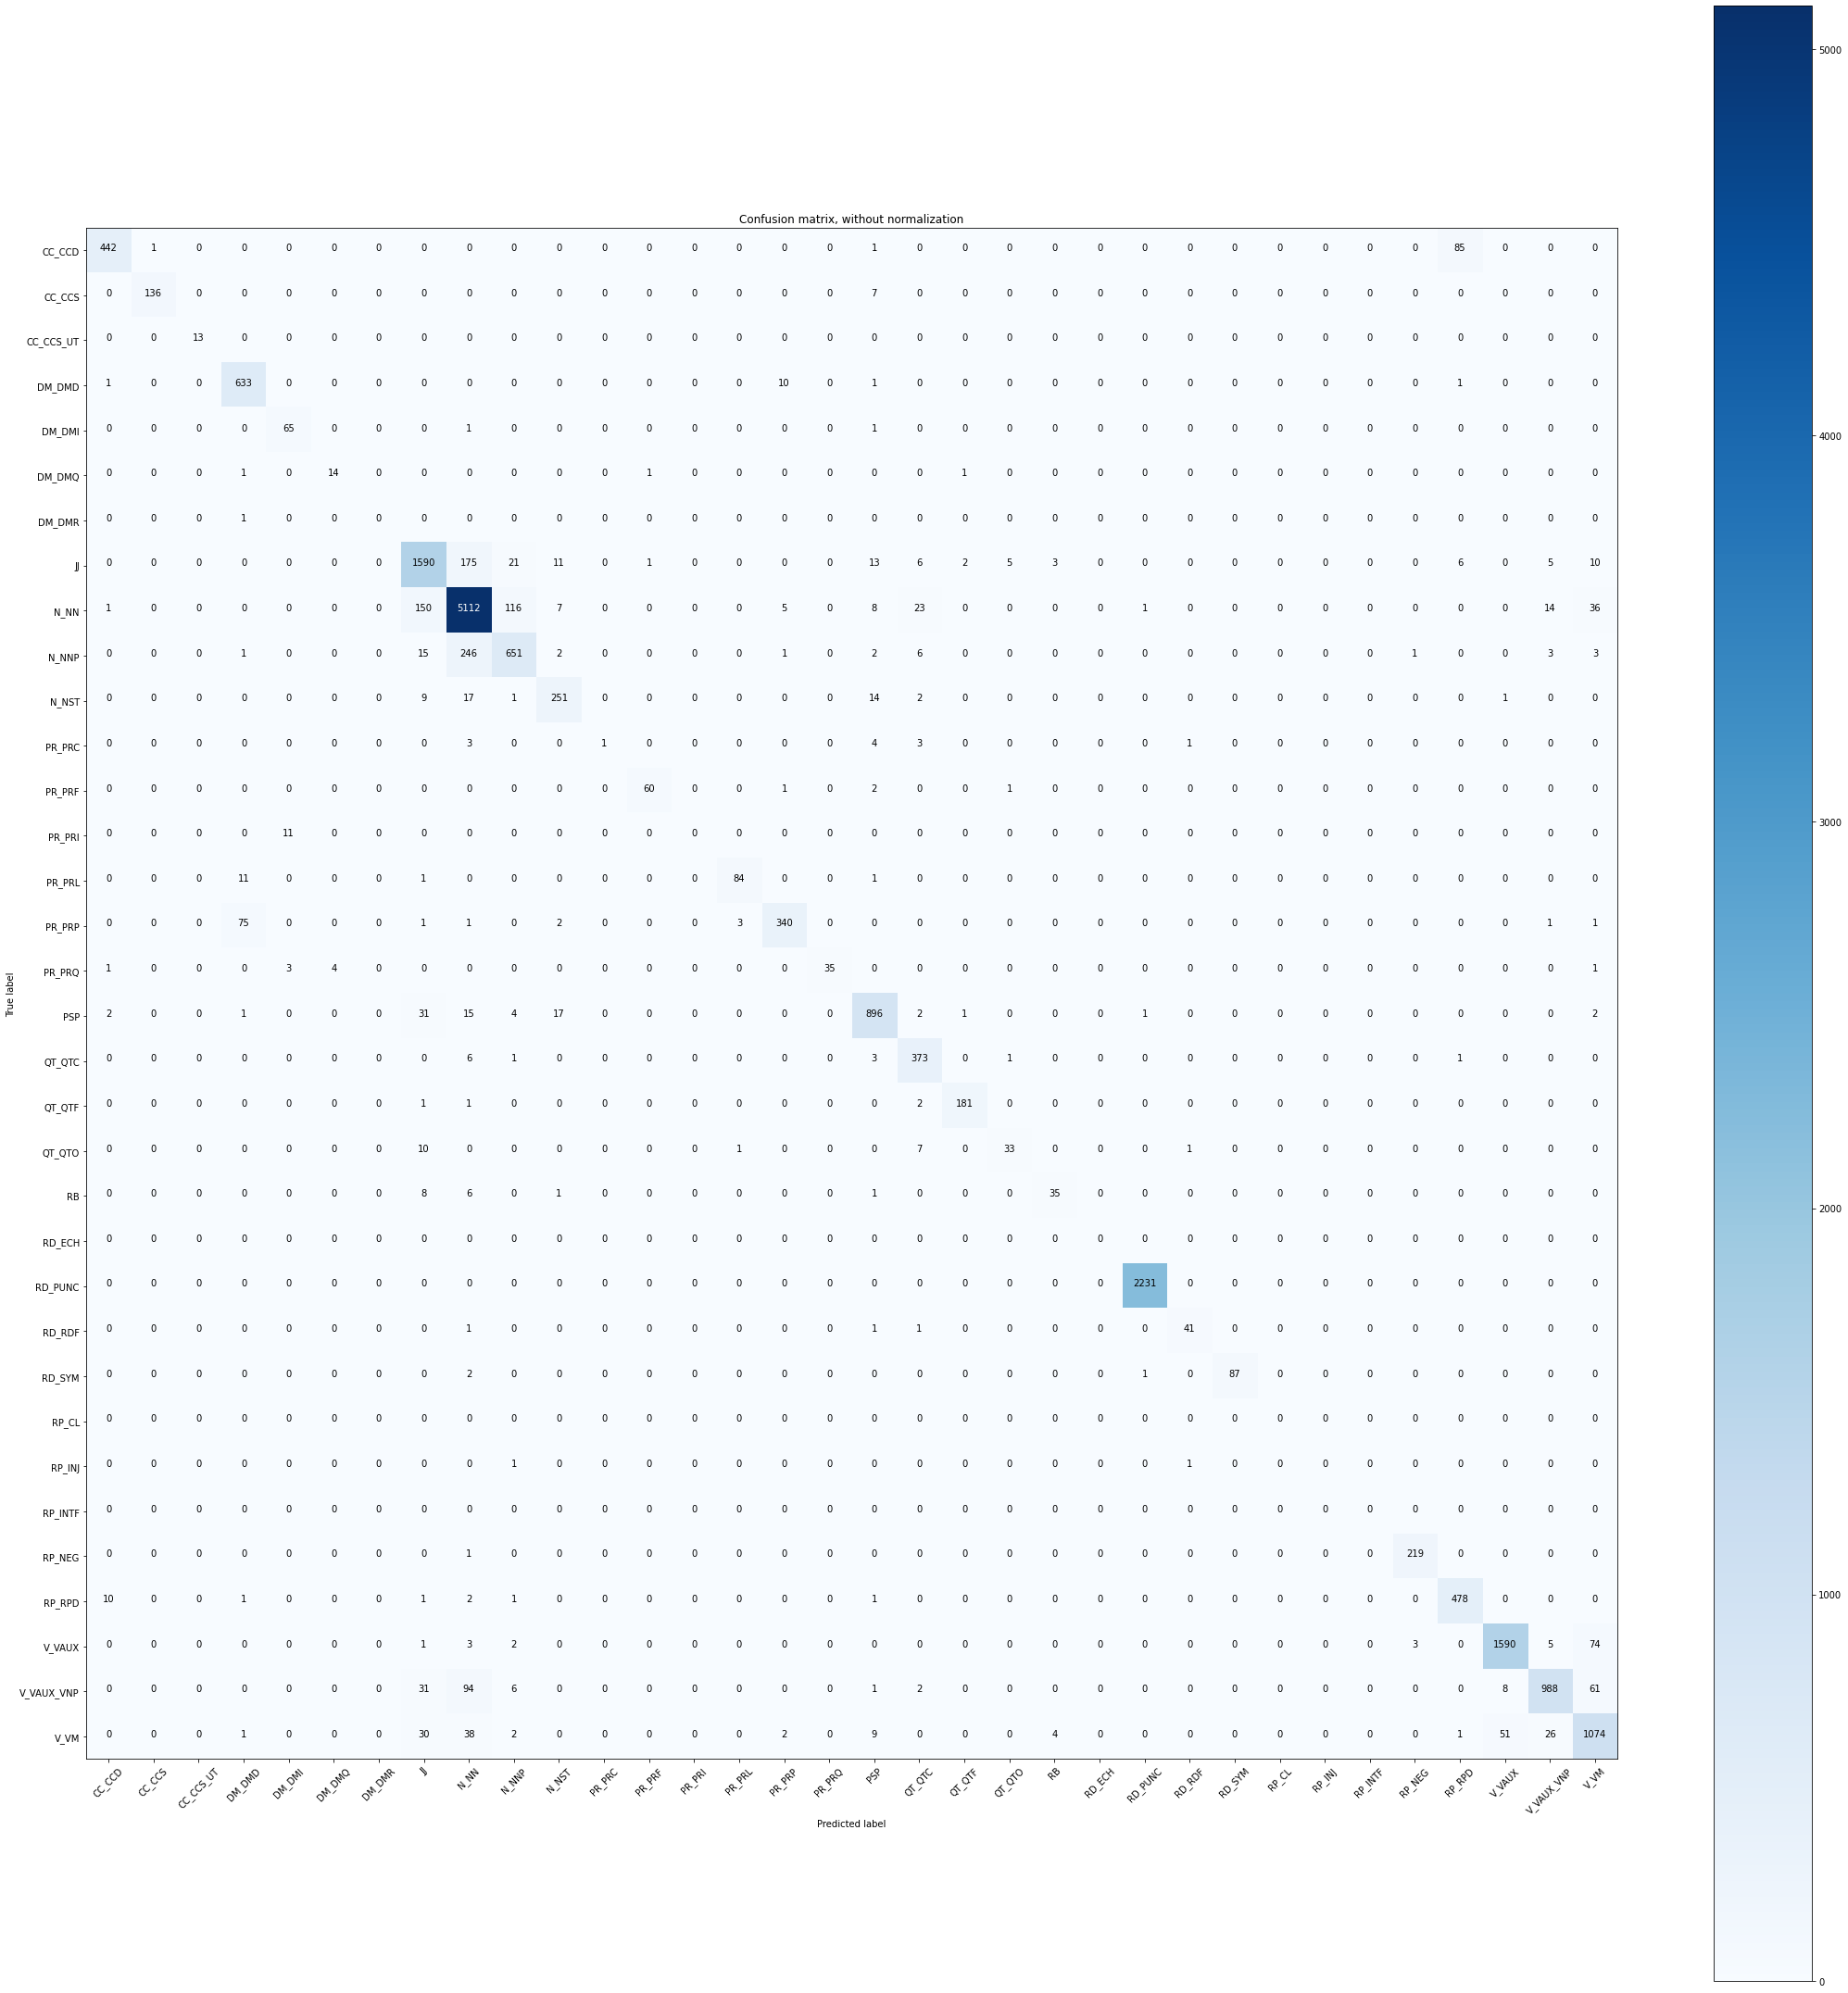

In [54]:
Y_pred = lstm_model.predict(X_test)
pred = []
for i in range(len(Y_pred)):
  ind = np.argmax(Y_pred[i])
  pred.append(ind_to_class[ind])

import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    # plt.figure(figsize=(25, 25))
    np.set_printoptions(precision=2)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
class_names = unique
print(class_names)

cnf_matrix = confusion_matrix(true, pred, labels=class_names)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plt.rcParams["figure.figsize"] = (30, 30)
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')